# Imports and definitions

In [1]:
from XRDXRFutils.notebook_utils import *
from utility_functions import *


### Size of the detector ###
n_channels = 1280
length_channel = 50 * 10**(-4)   # in cm
width_channel = 0.8
L = n_channels * length_channel   # length of the detector


### Output ###
path_figures = 'figures/'
paths_to_create_delete = [path_figures]

# Positioning detector with fixed $\theta_\textrm{min}$ and $\theta_\textrm{max}$

### Relation between $a, s, \beta$

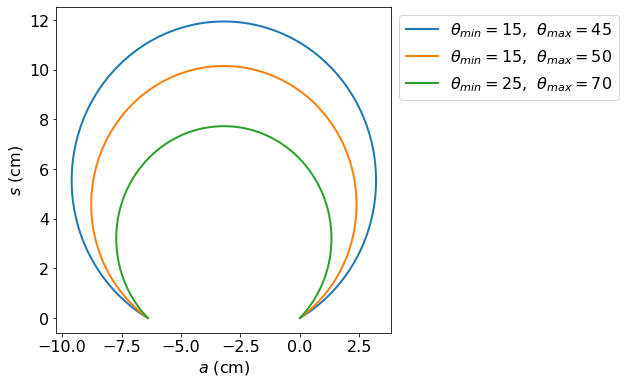

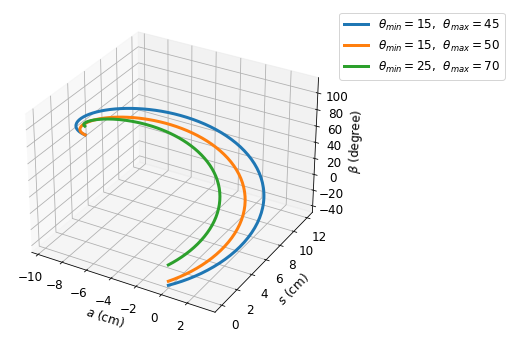

In [2]:
theta_min_choices = [15, 15, 25]
theta_max_choices = [45, 50, 70]

###

list_a, list_s, list_beta = [], [], []
for theta_min, theta_max in zip(theta_min_choices, theta_max_choices):
    beta = arange(theta_max - 90, theta_min + 90.1, 1)
    a, s = a_s_from_beta(beta, L, theta_min, theta_max)
    list_a.append(a)
    list_s.append(s)
    list_beta.append(beta)

rcParams['font.size'] = 16

fig, ax = subplots(figsize = (6, 6))
for i in range(len(list_beta)):
    ax.plot(list_a[i], list_s[i], ls = '-', lw = 2, label = r'$\theta_{min} = $' + f'{theta_min_choices[i]}' + r',  $\theta_{max} = $' + f'{theta_max_choices[i]}')
ax.set_xlabel(r'$a$ (cm)')
ax.set_ylabel(r'$s$ (cm)')
ax.legend(frameon = True, bbox_to_anchor = (1, 1), loc = 'upper left')
savefig(f'{path_figures}circle_2d.png', bbox_inches = 'tight', dpi = 300)
show()

rcParams['font.size'] = 12

fig = figure(figsize = (6, 6))
ax = fig.add_subplot(projection = '3d')
for i in range(len(list_beta)):
    ax.plot(list_a[i], list_s[i], list_beta[i], lw = 3, label = r'$\theta_{min} = $' + f'{theta_min_choices[i]}' + r',  $\theta_{max} = $' + f'{theta_max_choices[i]}')
    #ax.scatter(list_a[i], list_s[i], list_beta[i], lw = 3, label = r'$\theta_{min} = $' + f'{theta_min_choices[i]}' + r',  $\theta_{max} = $' + f'{theta_max_choices[i]}')
ax.set_xlabel(r'$a$ (cm)')
ax.set_ylabel(r'$s$ (cm)')
ax.set_zlabel(r'$\beta$ (degree)')
ax.legend(frameon = True, bbox_to_anchor = (1, 1), loc = 'upper left')
savefig(f'{path_figures}circle_3d.png', bbox_inches = 'tight', dpi = 300)
show()

### Positions and orientations of the detector

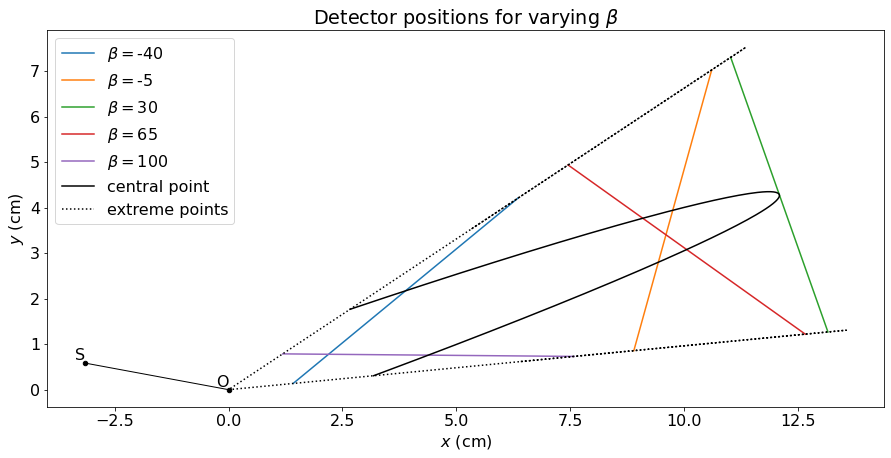

In [6]:
### Geometry of the detector (Venere) ###
theta_min = 16
theta_max = 44


### Geometry of the beam ###
i = 10.5   # Incident angle
d = 0.5 * L   # Distance between sample and focus of the source

### Plot ###
rcParams['font.size'] = 16

###

coords_S = [-d * cos(deg2rad(i)), d * sin(deg2rad(i))]
coords_O = [0, 0]

fig, ax = subplots(figsize = (15, 15))

# Draw the incident ray
ax.plot([coords_S[0], coords_O[0]], [coords_S[1], coords_O[1]], color = 'black', lw = 1)

# Mark the points
ax.scatter(*coords_S, c = 'black', s = 20, zorder = 2.5)
ax.annotate('S', coords_S, ha = 'right', va = 'bottom')
ax.scatter(*coords_O, c = 'black', s = 20, zorder = 2.5)
ax.annotate('O', coords_O, ha = 'right', va = 'bottom')

# Draw some positions of the detector
arr_beta = arange(-40, 101, 35)
arr_a, arr_s = a_s_from_beta(arr_beta, L, theta_min, theta_max)
arr_coords_A = asarray([arr_s * cos(deg2rad(arr_beta - i)) - arr_a * sin(deg2rad(arr_beta - i)), arr_a * cos(deg2rad(arr_beta - i)) + arr_s * sin(deg2rad(arr_beta - i))]).T
arr_coords_B = asarray([arr_s * cos(deg2rad(arr_beta - i)) - (L + arr_a) * sin(deg2rad(arr_beta - i)), (L + arr_a) * cos(deg2rad(arr_beta - i)) + arr_s * sin(deg2rad(arr_beta - i))]).T
for idx_beta, beta in enumerate(arr_beta):
    plot([arr_coords_A[idx_beta, 0], arr_coords_B[idx_beta, 0]], [arr_coords_A[idx_beta, 1], arr_coords_B[idx_beta, 1]], label = r'$\beta = $' + f'{beta}')

# Draw trajectories of the detector
arr_beta = arange(theta_max - 90, theta_min + 90.1, 1)
arr_a, arr_s = a_s_from_beta(arr_beta, L, theta_min, theta_max)
arr_coords_A = asarray([arr_s * cos(deg2rad(arr_beta - i)) - arr_a * sin(deg2rad(arr_beta - i)), arr_a * cos(deg2rad(arr_beta - i)) + arr_s * sin(deg2rad(arr_beta - i))]).T
arr_coords_B = asarray([arr_s * cos(deg2rad(arr_beta - i)) - (L + arr_a) * sin(deg2rad(arr_beta - i)), (L + arr_a) * cos(deg2rad(arr_beta - i)) + arr_s * sin(deg2rad(arr_beta - i))]).T
arr_coords_M = (arr_coords_A + arr_coords_B) / 2
plot(*arr_coords_M.T, c = 'black', ls = '-', label = 'central point')
plot(*arr_coords_A.T, c = 'black', ls = ':', label = 'extreme points')
plot(*arr_coords_B.T, c = 'black', ls = ':')

ax.set_aspect(1)
ax.legend(frameon = True)
ax.set_xlabel(r'$x$ (cm)')
ax.set_ylabel(r'$y$ (cm)')
ax.set_title(r'Detector positions for varying $\beta$')# + '\n' + r'$\theta_\mathrm{min}$')
show()

# Convert coordinates

In [4]:
a, s, beta = R_alpha_gamma__to__a_s_beta(R, alpha, gamma, L)

In [ ]:
R, alpha, gamma = a_s_beta__to__R_alpha_gamma(a, s, beta, L)